Нужно реализовать задачу нахождения уровня влияния факторов на успешность аккаунта. Критерием успешности является количество лайков.

In [ ]:
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Twitter Jan Mar.csv')
df.head()

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0


In [ ]:
df=df.dropna(subset='content')
df=df.dropna(subset='like_count')

In [ ]:
df['len'] = df.content.apply(len)
df

,date,id,content,username,like_count,retweet_count,len
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,123
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,40
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0,201
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,143
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0,279
...,...,...,...,...,...,...,...
500031,2023-01-04 07:18:08+00:00,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,1.0,0.0,277
500032,2023-01-04 07:17:50+00:00,1610535961670172674,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,TryingToOffend,2.0,0.0,94
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,mcp350,3.0,1.0,68
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0,79


In [ ]:
post = df.groupby(['username'])['content'].count().reset_index() # Количество постов
post_len = df.groupby(['username'])['len'].mean().reset_index() # Среднаяя длина постов аккаунта
retweet = df.groupby(['username'])['retweet_count'].sum().reset_index() # Сумма ретвитах на постах аккаунта
like = df.groupby(['username'])['like_count'].sum().reset_index() # Общее кол-во лайков на постах аккаунта

In [ ]:
df = pd.DataFrame({'username': post['username'], 'post_count': post['content'], 'mean_len': post_len['len'], 'retweet_sum': retweet['retweet_count'], 'like_sum':like['like_count']})
df = df.set_index('username')
df

,post_count,mean_len,retweet_sum,like_sum
username,,,,
000000000000oh,1,59.000000,0.0,0.0
0000Origins,1,122.000000,0.0,0.0
000Dave,3,224.333333,2.0,14.0
000_Mike_000,1,45.000000,0.0,0.0
000dotpls,3,126.333333,1.0,5.0
...,...,...,...,...
zzongiszzang,1,29.000000,0.0,0.0
zzsaif777,1,38.000000,0.0,1.0
zzz_jah,1,121.000000,0.0,14.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249998 entries, 000000000000oh to zzzzzrrrrrr3344
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_count   249998 non-null  int64  
 1   mean_len     249998 non-null  float64
 2   retweet_sum  249998 non-null  float64
 3   like_sum     249998 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 9.5+ MB


<AxesSubplot: >

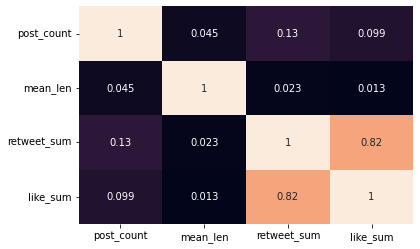

In [ ]:
sns.heatmap(df.corr(), annot=True, cbar= False)

* Между post_count и mean_len значение корреляции равно 0.045360. Это близко к нулю, что указывает на отсутствие линейной корреляции между этими двумя переменными.

* Между post_count и retweet_sum значение корреляции равно 0.129633. Это положительная корреляция, что может указывать на то, что, в среднем, более высокий post_count связан с более высоким retweet_sum.

* Между post_count и like_sum значение корреляции равно 0.098654. Это также положительная корреляция, что может указывать на то, что, в среднем, более высокий post_count связан с более высоким like_sum.

* Между mean_len и retweet_sum значение корреляции равно 0.022635. Это очень близко к нулю, что указывает на отсутствие линейной корреляции между этими двумя переменными.

* Между mean_len и like_sum значение корреляции равно 0.013002. Это также очень близко к нулю, что указывает на отсутствие линейной корреляции между этими двумя переменными.

* Между retweet_sum и like_sum значение корреляции равно 0.822330. Это сильная положительная корреляция, что может указывать на то, что более высокое количество ретвитов (retweet_sum) обычно сопровождается более высоким количеством лайков (like_sum).

In [ ]:
correlation_matrix = df.corr()
# Отсортируйте абсолютные значения корреляции между y и другими переменными
correlation_with_y = correlation_matrix['like_sum'].abs().sort_values(ascending=False)

# Выведите рейтинг влияния переменных на y
correlation_with_y.tail(len(correlation_matrix)-1)

retweet_sum    0.822330
post_count     0.098654
mean_len       0.013002
Name: like_sum, dtype: float64

In [ ]:
df

,post_count,mean_len,retweet_sum,like_sum
username,,,,
000000000000oh,1,59.000000,0.0,0.0
0000Origins,1,122.000000,0.0,0.0
000Dave,3,224.333333,2.0,14.0
000_Mike_000,1,45.000000,0.0,0.0
000dotpls,3,126.333333,1.0,5.0
...,...,...,...,...
zzongiszzang,1,29.000000,0.0,0.0
zzsaif777,1,38.000000,0.0,1.0
zzz_jah,1,121.000000,0.0,14.0


In [ ]:
y=df['like_sum']
x=df.drop('like_sum', axis=1)
x.head()

,post_count,mean_len,retweet_sum
username,,,
000000000000oh,1,59.000000,0.0
0000Origins,1,122.000000,0.0
000Dave,3,224.333333,2.0
000_Mike_000,1,45.000000,0.0
000dotpls,3,126.333333,1.0


In [ ]:
#Разбить выборку на обучающую и тестовую.
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.2, shuffle=False)#,random_state=True)#
x_test.head()

,post_count,mean_len,retweet_sum
username,,,
mlynxqualey,1,209.0,1.0
mm_alali1,1,73.0,0.0
mm_brockmeyer,1,61.0,0.0
mm_newsletter,2,128.0,0.0
mm_vampz,1,109.0,0.0


In [ ]:
m = LinearRegression()
m.fit(x_train, y_train)
ypred= m.predict((x_test))

In [ ]:
#MAE
np.mean(abs(y_test-ypred))

10.38783114142783

In [ ]:
#MAPE
np.mean(abs(((y_test+1)-(ypred+1))/(y_test+1) ))

2.0723205155010485

In [ ]:
#коэффициент детерминации R-квадрат
r2_score(y_test, ypred)

0.5980622870596659

Около 59.8% вариабельности зависимой переменной может быть объяснено независимыми переменными, использованными в модели регрессии. Таким образом, модель объясняет большую часть вариабельности, но не все

In [ ]:
for i in range (x.shape[1]):
    print(x.columns.tolist()[i],m.coef_[i])

post_count 0.06485570235416871
mean_len -0.03131773451854869
retweet_sum 3.9150109056744826
